In [128]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from tqdm import tqdm
import math

In [8]:
from google.colab import files

uploaded = files.upload()

Saving classification.csv to classification.csv


## Problem 1 ##


In [129]:
def classification_error(y, y_hat):
  return sum(y!=y_hat)/y.shape[0]

In [131]:
def plot_dataset(data):

  fig, ax = plt.subplots()
  colors = np.array([ 'r', 'g' ])
  ax.scatter(data[:,0], data[:,1], c=colors[data[:,2].astype(int)], s=10)
  ax.set_xlabel('age')
  ax.set_ylabel('interest')
  plt.show()

In [146]:
class LeastSquares:

  def __init__(self):
    self.w = None

  def transform_x(self, x):

    x_transform = np.ones((x.shape[0],x.shape[1]+1))
    x_transform[:,1:] =  x

    return x_transform

  def fit(self, data):

    x = data[:,:-1]
    y = data[:,-1]
    x = self.transform_x(x)
    self.w = inv((x.T).dot(x)).dot(x.T).dot(y)

  def predict(self, data):
    x = self.transform_x(data[:,:-1])
    pred = np.dot(x, self.w)
    y_hat = [1 if i > 0.5 else 0 for i in pred]
    return y_hat

  def plot(self, data):
    fig, ax = plt.subplots()
    colors = np.array([ 'r', 'g' ])
    ax.scatter(data[:,0], data[:,1], c=colors[data[:,2].astype(int)], s=10)
    x1 = np.linspace(0, 50)
    x2 = -((self.w[0] - 0.5) / self.w[2]) - (self.w[1] / self.w[2]) * x1 
    ax.plot(x1, x2, color='b')
    ax.set_xlabel('age')
    ax.set_ylabel('interest')
    ax.set_title('Least Squares Method')
    plt.show()

In [177]:
class LogisticRegression: 

  def __init__(self, learning_rate = 0.001, epochs = 1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def sigmoid(self, z):
    return 1.0/(1 + np.exp(-z))

  def loss(self, y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

  def fit(self, data, initial_weights):

    x = data[:,:-1]
    y = data[:,-1]
    y = y.reshape(y.shape[0],1)

    m, n = x.shape 

    self.weights = initial_weights
    self.bias = 0

    for epoch in range(self.epochs):

      y_hat = self.sigmoid(np.dot(x, self.weights) + self.bias)

      dw = (2/m)*((x.T).dot(y_hat - y)) 
      db = (2/m)*np.sum((y_hat - y))

      self.weights -= self.learning_rate*dw
      self.bias -= self.learning_rate*db
  
  def predict(self, data):
    pred = self.sigmoid(np.dot(data[:,:-1], self.weights) + self.bias)
    y_hat = [1 if i > 0.5 else 0 for i in pred]
    return y_hat
    
  def plot_3D(self, data):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    colors = np.array([ 'r', 'g'])
    pred = self.sigmoid(np.dot(data[:,:-1], self.weights) + self.bias)
    y_hat = [1 if i > 0.5 else 0 for i in pred]
    ax.scatter3D(data[:,0], data[:,1], pred, c = colors[y_hat], s=10)
    ax.set_xlabel('age')
    ax.set_ylabel('interest')
    ax.set_title('3D plot depicting sigmoid plot obtained')
    ax.view_init(0, 0)
  
  def plot_db(self, data):
    fig, ax = plt.subplots()
    colors = np.array([ 'r', 'g' ])
    ax.scatter(data[:,0], data[:,1], c=colors[data[:,2].astype(int)], s=10)
    x1 = np.linspace(0, 50)
    x2 = -((self.bias - 0.5) / self.weights[1]) - (self.weights[0] / self.weights[1]) * x1 
    ax.plot(x1, x2, color='b')
    ax.set_xlabel('age')
    ax.set_ylabel('interest')
    ax.set_title('Logistic Regression')
    plt.show()

In [188]:
def linear_discriminant_boundary(x, y):

    no_of_features = x.shape[1]
    class_labels = [0, 1]

    mean_overall = np.mean(x, axis=0)
    SW = np.zeros((no_of_features, no_of_features))
    SB = np.zeros((no_of_features, no_of_features))

    mean_cs = []

    for c in class_labels:

      x_c = x[y == c]
      mean_c = np.mean(x_c, axis=0)

      SW += (x_c - mean_c).T.dot((x_c - mean_c))

      n_c = x_c.shape[0]
      mean_diff = (mean_c - mean_overall).reshape(no_of_features, 1)
      SB += n_c * (mean_diff).dot(mean_diff.T)

      mean_cs.append(mean_c)

    mean_cs = np.array(mean_cs)

    A = np.linalg.inv(SW).dot(SB)
    eigenvalues, eigenvectors = np.linalg.eig(A)
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    m = - (eigenvectors[0,0]/ eigenvectors[0,1])
    p1 = (mean_cs[0,0] + mean_cs[1,0])/2
    p2 = (mean_cs[0,1] + mean_cs[1,1])/2
    c =  p2 - m*p1

    fig, ax = plt.subplots()
    colors = np.array([ 'r', 'g' ])
    ax.scatter(x[:,0], x[:,1], c=colors[y.astype(int)], s=10)
    x1 = np.linspace(0, 50)
    x2 = m*x1 + c
    ax.plot(x1, x2, color='b')
    ax.set_xlabel('age')
    ax.set_ylabel('interest')
    ax.set_title('Linear Discriminant Boundary')
    plt.show()

In [184]:
def n_poly_transform(x, n):

  x = x.astype(int)
  x_transform  = x
  x_t = x
  for i in range(2,n+1):
    nx_t = []
    for j in range(x_t.shape[1]):
      for k in range(x.shape[1]):
        nx_t.append(x[:,k]*x_t[:,j])
    nx_t = np.array(nx_t)
    nx_t = nx_t.T
    nx_t = np.unique(nx_t, axis=1)
    x_transform = np.concatenate((x_transform, nx_t), axis=1)
    x_t = nx_t
    
  return x_transform

In [197]:
def n_degree_analysis(data):

  degrees = [i+1 for i in range(10)]
  errors = []
  for i in range(10):
    x_transform = n_poly_transform(data[:,:-1], i+1)
    y_transform = data[:,-1]
    y_transform = y_transform.reshape(y_transform.shape[0],1)
    data_n = np.concatenate((x_transform, y_transform), axis=1)
    logreg = LogisticRegression(epochs=100000)
    logreg.fit(data_n, np.zeros((x_transform.shape[1],1)))
    y = data[:,-1]
    y_hat = logreg.predict(data_n)
    n_error = classification_error(y, y_hat)
    errors.append(n_error)

  fig, ax = plt.subplots()

  ax.plot(degrees, errors)
  ax.set_xlabel("Degree")
  ax.set_ylabel("Error")

  plt.show()

  print("Minimum error is obtained at degree",errors.index(min(errors))+1)

In [201]:
def non_linear_decision_boundary(data):

  fig, ax = plt.subplots(10,1,figsize=(5,50))
  colors = np.array([ 'r', 'g' ])

  for i in range(10):
    
    x_transform = n_poly_transform(data[:,:-1], i+1)
    y_transform = data[:,-1]
    y_transform = y_transform.reshape(y_transform.shape[0],1)
    data_n = np.concatenate((x_transform, y_transform), axis=1)
    logreg = LogisticRegression(epochs=100000)
    logreg.fit(data_n, np.zeros((x_transform.shape[1],1)))

    x1grid = np.arange(0,50,1)
    x2grid = np.arange(0,100,1)
    xx,yy = np.meshgrid(x1grid,x2grid)
    r1,r2 = xx.flatten(),yy.flatten()
    r1,r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1))
    grid = np.hstack((r1,r2))
    grid_transform = n_poly_transform(grid, i+1)
    y_t = np.zeros((grid.shape[0],1))
    data_grid = np.concatenate((grid_transform, y_t), axis=1)
    y_hat = logreg.predict(data_grid)
    y_hat = np.array(y_hat)
    zz = y_hat.reshape(xx.shape)

    ax[i].contourf(xx,yy,zz,cmap='Pastel2')
    ax[i].scatter(data[:,0], data[:,1], c=colors[data[:,-1].astype(int)], s=10)
    ax[i].set_xlabel("x1")
    ax[i].set_ylabel("x2")
    ax[i].set_title("Decision boundary for degree %d"%(i+1))

In [138]:
data = pd.read_csv('classification.csv')

In [139]:
data

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [140]:
data = data.to_numpy()

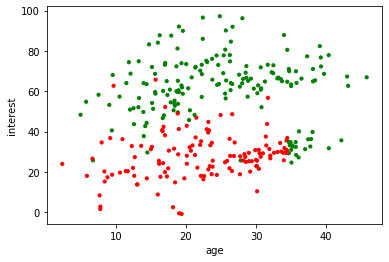

In [141]:
plot_dataset(data)

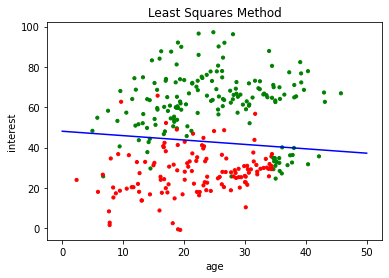

Error obtained for least square method is  0.12457912457912458


In [148]:
leastsq = LeastSquares()
leastsq.fit(data)
leastsq.plot(data)
y_pred = leastsq.predict(data)
print("Error obtained for least square method is ",classification_error(data[:,-1], y_pred))

The decision boundary of least square method is quite accurate for the given data. The error obtained is 0.125. The error is calculated by finding the ratio of incorrect predictions with total number of predictions made. In this case, it means that about 12.5% of predictions made have gone wrong.

In [180]:
logreg = LogisticRegression(epochs=100000)
logreg.fit(data, initial_weights=np.array([[0.1],[-0.1]]))

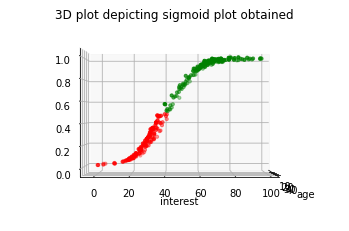

In [181]:
logreg.plot_3D(data)

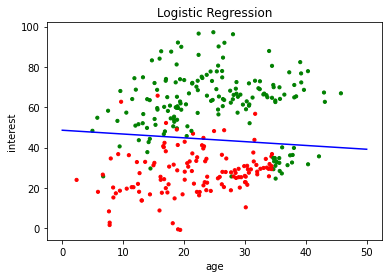

Error obtained for logistic regression is  0.12794612794612795


In [182]:
logreg.plot_db(data)
y_pred = logreg.predict(data)
print("Error obtained for logistic regression is ",classification_error(data[:,-1], y_pred))

The error obtained for logistic regression after 100000 epochs is 0.128. This shows that logistic regression performed slightly worse than least square method

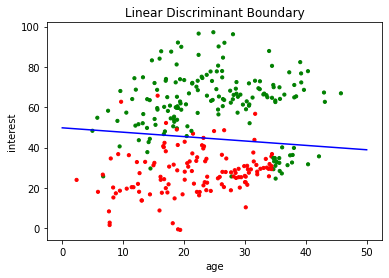

In [189]:
linear_discriminant_boundary(data[:,:-1], data[:,-1])

On comparing the plot of linear discriminant boundary with least square method and logistic regression, we can say that all three decision boundaries are quite similar to each other. Thus, the performance levels of all 3 methods on this data is quite similar. 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


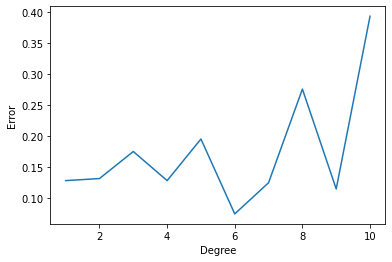

Minimum error is obtained at degree 6


In [198]:
n_degree_analysis(data)

We can observe from the above plot that the minimum error is obtained when the data is transformed into a 6 degree polynomial. Therefore, we get the most optimal performance out of logistic regression by converting the input attributes into a 6 degree polynomial.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


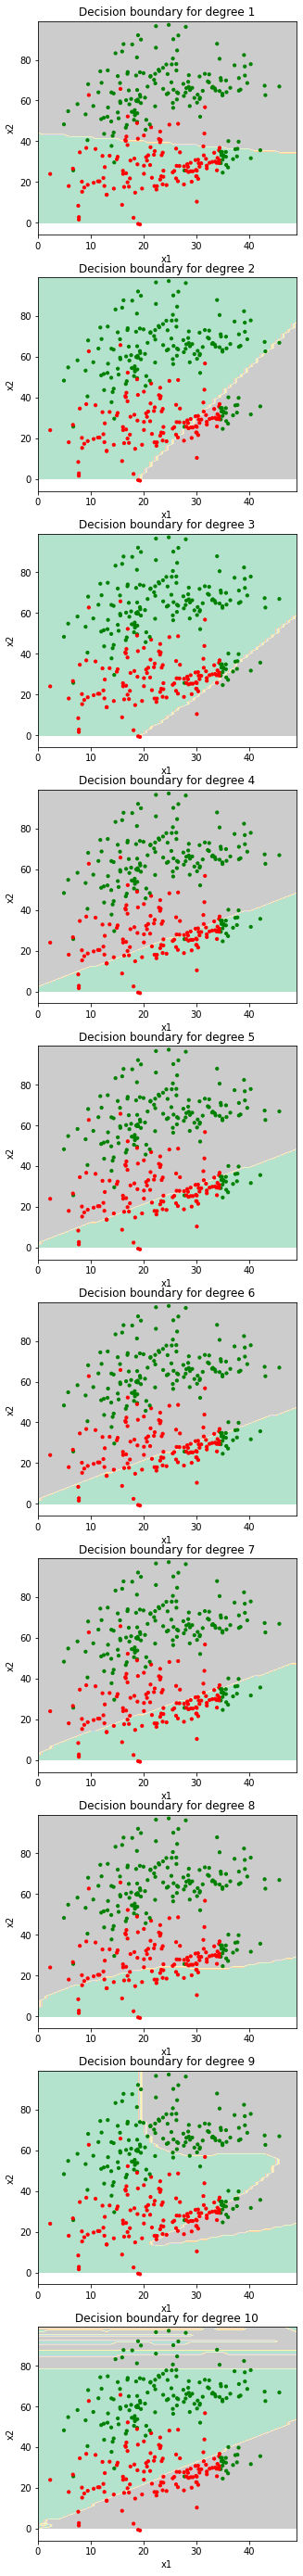

In [202]:
non_linear_decision_boundary(data)

## Problem 2 ##

In [52]:
def data_preprocessing(data):

  for i in range(data.shape[0]):
    if data[i,-1] == ' <=50K.':
      data[i,-1] = ' <=50K'
    if data[i,-1] == ' >50K.':
      data[i,-1] = ' >50K'

  ind = [1,3,5,6,7,8,9,13,14]
  for i in ind:
    data[:,i] = np.array(pd.Series(data[:,i], dtype='category').cat.codes.values)

  return data

In [53]:
def split_data(data):
  
  np.random.shuffle(data)
  split_point = int(0.8*(data.shape[0]))
  train_data = data[:split_point,:]
  val_data = data[split_point:,:]
  return train_data, val_data

In [54]:
class Node:

  def __init__(self, feature = None, threshold = None, left_child = None, right_child = None, value = -1):
    self.feature = feature 
    self.threshold = threshold
    self.left_child = left_child
    self.right_child = right_child
    self.value = value

In [203]:
class DecisionTree:

  def __init__(self, max_nodes=100, min_samples = 2):
    self.min_samples = min_samples
    self.max_nodes = max_nodes
    self.nodes = 0
    self.root = None

  def finished(self, number_of_labels, samples):
    
    if self.nodes + 2 > self.max_nodes or number_of_labels == 1:
      return True
    
    return False

  def entropy(self, y):
    proportions = np.bincount(y)/len(y)
    entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
    return entropy

  def create_split(self, x_feature, threshold):
    left_indices = np.argwhere(x_feature <= threshold).flatten()
    right_indices = np.argwhere(x_feature > threshold).flatten()
    return left_indices, right_indices

  def information_gain(self, x_feature, y, threshold):
    
    parent_loss = self.entropy(y)

    left_child_indices, right_child_indices = self.create_split(x_feature, threshold)

    n, n_left, n_right = len(y), len(left_child_indices), len(right_child_indices)

    if n_left == 0 or n_right == 0: 
      return 0

    left_child_loss = self.entropy(y[left_child_indices])
    right_child_loss = self.entropy(y[right_child_indices])
        
    children_loss = (n_left / n) * left_child_loss + (n_right / n) * right_child_loss
    return parent_loss - children_loss  

  def best_split(self, x, y):

    best_score = 0
    best_feature = None
    best_threshold = None
    features = x.shape[1]

    for feature in range(features):
      
      x_feature = x[:,feature]
      thresholds = np.unique(x_feature)

      if thresholds.shape[0] > 125:

        thresholds = np.sort(thresholds)
        step = int(np.floor(thresholds.shape[0]/125))
        thresholds = thresholds[::step]

      for threshold in thresholds:
          
        score = self.information_gain(x_feature, y, threshold)

        if score > best_score:
          best_score = score
          best_feature = feature
          best_threshold = threshold

    return best_feature, best_threshold

  def build_tree(self, x, y):

    self.nodes += 1
    number_of_labels = len(np.unique(y))   
    samples = x.shape[0] 
     
    if self.finished(number_of_labels, samples):
      return Node(value = np.argmax(np.bincount(y)))
    
    best_feature = None
    best_threshold = None
    best_feature , best_threshold = self.best_split(x, y)

    left_child_indices, right_child_indices = self.create_split(x[:,best_feature], best_threshold)
    left_child = self.build_tree(x[left_child_indices,:], y[left_child_indices])
    right_child = self.build_tree(x[right_child_indices,:], y[right_child_indices])
    
    return Node(feature = best_feature, threshold = best_threshold, left_child = left_child, right_child = right_child)

  def traverse_tree(self, x, node):
        
    if node.value != -1:
      return node.value
        
    if x[node.feature] <= node.threshold:
      return self.traverse_tree(x, node.left_child)
    
    return self.traverse_tree(x, node.right_child)

  def fit(self, x, y):
    self.root = self.build_tree(x, y) 

  def predict(self, x):
    y_hat = [self.traverse_tree(xp, self.root) for xp in x]
    return np.array(y_hat)

In [204]:
def decision_tree_analysis(train_data, val_data):

  train_x = train_data[:,:-1]
  train_y = train_data[:,-1]
  val_x = val_data[:,:-1]
  val_y = val_data[:,-1]
  train_errors = []
  val_errors = []
  no_of_nodes = []

  for i in tqdm(range(1, 200)):

    no_of_nodes.append(i)

    decision_tree = DecisionTree(max_nodes = i)

    decision_tree.fit(train_x, train_y)

    y_train_pred = decision_tree.predict(train_x)
    y_val_pred = decision_tree.predict(val_x)

    train_error = classification_error(train_y, y_train_pred)
    val_error = classification_error(val_y, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)
  
  print("\nMinimum validation error is ",min(val_errors)," which is obtained when no of nodes = ",val_errors.index(min(val_errors))+1)
  print("\nMinimum training error is ",min(train_errors)," which is obtained when no of nodes = ",train_errors.index(min(train_errors))+1)
  fig, ax = plt.subplots()
  ax.plot(no_of_nodes, train_errors,'-r',label='Training Error')
  ax.plot(no_of_nodes, val_errors,'-g',label='Validation Error')
  ax.set_xlabel('No of nodes')
  ax.legend()
  plt.show()

In [57]:
def bootstrap(data, no_of_datasets):

  m = data.shape[0]
  bootstrap_data = []

  for i in range(no_of_datasets):
    bootstrap_data.append(data[np.random.choice(data.shape[0], data.shape[0], replace=False),:])
  
  bootstrap_data = np.array(bootstrap_data)

  return bootstrap_data

In [209]:
def bootstrap_analysis(bootstrap_data):

  no_of_nodes = [i for i in range(1,15)]
  bootstrap_train_errors = []

  for i in tqdm(range(bootstrap_data.shape[0])):

    train_data = bootstrap_data[i,:,:]
    train_x = train_data[:,:-1]
    train_y = train_data[:,-1]
    train_errors = []

    for j in range(1, 15):

      decision_tree = DecisionTree(max_nodes = j)

      decision_tree.fit(train_x, train_y)

      y_train_pred = decision_tree.predict(train_x)

      train_error = classification_error(train_y, y_train_pred)
      train_errors.append(train_error)

    print("\nMinimum training error on dataset", i+1," is ",min(train_errors)," which is obtained when no of nodes = ",train_errors.index(min(train_errors))+1)
    bootstrap_train_errors.append(train_errors)
  
  avg_train_errors = np.mean(np.array(bootstrap_train_errors), axis=0) 

  colors = np.array([ 'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
  
  fig, ax = plt.subplots(2)
  
  for i in range(10):
    ax[0].plot(no_of_nodes,bootstrap_train_errors[i], color=colors[i], label='dataset = %d'%(i+1))

  ax[0].set_xlabel("No of nodes")
  ax[0].set_ylabel("Training Error")
  ax[0].legend(bbox_to_anchor=(1.04,0.5), loc="center left")
  ax[0].set_title('Training errors when trained on 10 datasets')

  ax[1].plot(no_of_nodes,avg_train_errors)
  ax[1].set_xlabel("No of nodes")
  ax[1].set_ylabel("Training Error")

  plt.show()

In [60]:
class PCA:

  def standardize_data(self, x):
    return x - np.mean(x, axis=0) / np.std(x, axis=0)
    
  def get_covariance_matrix(self):
    return np.dot(self.xs.T, self.xs) / (self.no_of_samples)

  def get_eigenvectors(self, cm):

    eigenvalues, eigenvectors = np.linalg.eig(cm)

    cols = np.argsort(eigenvalues)[::-1][:self.no_of_components]
    vectors = eigenvectors[:, cols]
    return vectors

  def project_matrix(self, eigenvectors):
    return np.dot(self.xs, eigenvectors)

  def fit_transform(self, x, no_of_components=2):

    self.no_of_samples = x.shape[0]
    self.no_of_components = no_of_components
      
    self.xs = self.standardize_data(x)
    covariance_matrix = self.get_covariance_matrix()
    eigenvectors = self.get_eigenvectors(covariance_matrix)
    projected_matrix = self.project_matrix(eigenvectors)

    return projected_matrix

In [78]:
def PCA_analysis(data):

  train_errors = []
  no_of_features = [i for i in range(2,data.shape[1])]

  for i in no_of_features:
    
    pca = PCA()
    x_pca = pca.fit_transform(data[:,:-1], no_of_components = i)
    
    decision_tree = DecisionTree(max_nodes = 5)
    decision_tree.fit(x_pca, data[:,-1])
    y_pred = decision_tree.predict(x_pca)
    train_error = classification_error(data[:,-1], y_pred)
    train_errors.append(train_error)

  fig, ax = plt.subplots()

  ax.plot(no_of_features,train_errors)
  ax.set_xlabel("No of features")
  ax.set_ylabel("Training Error")

  plt.show()

In [62]:
data2_1 = pd.read_csv("/content/adult.data", header = None)
data2_2 = pd.read_csv("/content/adult.test", header = None)

In [63]:
data2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [64]:
data2_1 = data2_1.to_numpy()
data2_2 = data2_2.to_numpy()

In [65]:
data2 = np.concatenate((data2_1,data2_2), axis = 0)

In [66]:
data2 = data_preprocessing(data2)

In [67]:
data2 = data2.astype(int)

In [68]:
train_data, val_data = split_data(data2)

100%|██████████| 199/199 [05:30<00:00,  1.66s/it]


Minimum validation error is  0.1695158153342205  which is obtained when no of nodes =  5

Minimum training error is  0.17170424589870242  which is obtained when no of nodes =  197


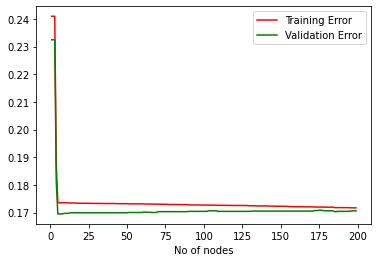

In [210]:
decision_tree_analysis(train_data, val_data)

The experiments are done on decision trees containing upto 199 nodes. The difference between training error and validation error keeps converging with increase in number of nodes. The optimal tree will be the one with 197 nodes. However, it is not desirable to have huge amounts of nodes in decision tree. So, it may be necessary to perform bootstrap

In [211]:
bootstrap_data = bootstrap(data2, 10)

 10%|█         | 1/10 [00:22<03:20, 22.32s/it]


Minimum training error on dataset 1  is  0.17269972564596045  which is obtained when no of nodes =  13


 20%|██        | 2/10 [00:43<02:54, 21.77s/it]


Minimum training error on dataset 2  is  0.17269972564596045  which is obtained when no of nodes =  13


 30%|███       | 3/10 [01:05<02:31, 21.57s/it]


Minimum training error on dataset 3  is  0.17269972564596045  which is obtained when no of nodes =  13


 40%|████      | 4/10 [01:26<02:08, 21.46s/it]


Minimum training error on dataset 4  is  0.17269972564596045  which is obtained when no of nodes =  13


 50%|█████     | 5/10 [01:47<01:46, 21.40s/it]


Minimum training error on dataset 5  is  0.17269972564596045  which is obtained when no of nodes =  13


 60%|██████    | 6/10 [02:08<01:25, 21.33s/it]


Minimum training error on dataset 6  is  0.17269972564596045  which is obtained when no of nodes =  13


 70%|███████   | 7/10 [02:30<01:03, 21.33s/it]


Minimum training error on dataset 7  is  0.17269972564596045  which is obtained when no of nodes =  13


 80%|████████  | 8/10 [02:51<00:42, 21.28s/it]


Minimum training error on dataset 8  is  0.17269972564596045  which is obtained when no of nodes =  13


 90%|█████████ | 9/10 [03:12<00:21, 21.31s/it]


Minimum training error on dataset 9  is  0.17269972564596045  which is obtained when no of nodes =  13


100%|██████████| 10/10 [03:34<00:00, 21.41s/it]


Minimum training error on dataset 10  is  0.17269972564596045  which is obtained when no of nodes =  13


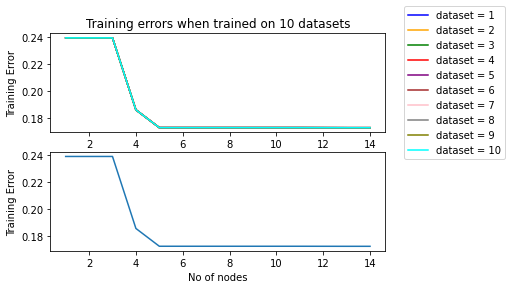

In [212]:
bootstrap_analysis(bootstrap_data)

We can observe from the plot that training error is pretty much the same when number of nodes are greater than 5. We can also observe that training error is almost same for all 10 datasets. So, I am choosing 5 as optimal number of nodes for the decision tree as it takes less time to train. The performance with bootstrapping is pretty much the same when compared to previous results.

Minimum training error is  0.18586462470824291  which is obtained when no of features =  10


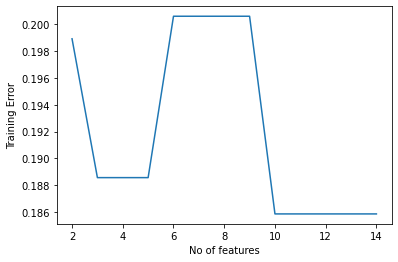

In [213]:
PCA_analysis(data2)

We can observe that we obtain minimum training error when number of features selected is greater than 10. We will choose 10 features as optimal number of features selected as it takes less time to train. The performance of optimal PCA is almost closer to the decision tree of first question. It performs just slightly worse in comparision.  